# Meromorphic Functions: Theory and Computational Analysis

## 1. Introduction

A **meromorphic function** is a complex function that is holomorphic (analytic) everywhere in its domain except at a set of isolated poles. The term "meromorphic" comes from the Greek *meros* (part) and *morphe* (form), indicating that the function is "partially holomorphic."

### 1.1 Formal Definition

A function $f: \Omega \to \mathbb{C} \cup \{\infty\}$ is **meromorphic** on an open set $\Omega \subseteq \mathbb{C}$ if:

1. $f$ is holomorphic on $\Omega \setminus P$, where $P$ is a discrete set of isolated points
2. At each point $z_0 \in P$, $f$ has a pole (i.e., $\lim_{z \to z_0} |f(z)| = \infty$)

### 1.2 Laurent Series Representation

Near a pole $z_0$ of order $n$, a meromorphic function admits a Laurent series expansion:

$$f(z) = \sum_{k=-n}^{\infty} a_k (z - z_0)^k = \frac{a_{-n}}{(z-z_0)^n} + \cdots + \frac{a_{-1}}{z-z_0} + a_0 + a_1(z-z_0) + \cdots$$

The **principal part** is the finite sum of negative-power terms:

$$\text{Prin}(f, z_0) = \sum_{k=-n}^{-1} a_k (z - z_0)^k$$

The coefficient $a_{-1}$ is the **residue** of $f$ at $z_0$:

$$\text{Res}(f, z_0) = a_{-1} = \frac{1}{2\pi i} \oint_\gamma f(z) \, dz$$

where $\gamma$ is a small contour encircling $z_0$.

### 1.3 Key Properties

1. **Closure under operations**: The sum, product, and quotient of meromorphic functions are meromorphic
2. **Rational functions**: Any rational function $f(z) = P(z)/Q(z)$ is meromorphic on $\mathbb{C}$
3. **Extended complex plane**: A meromorphic function on $\mathbb{C}$ extends to a holomorphic map $f: \mathbb{C} \cup \{\infty\} \to \mathbb{C} \cup \{\infty\}$ (the Riemann sphere)
4. **Residue theorem**: For a meromorphic function with poles $\{z_k\}$ inside a closed contour $\gamma$:

$$\oint_\gamma f(z) \, dz = 2\pi i \sum_k \text{Res}(f, z_k)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.rcParams['figure.figsize'] = (16, 12)
plt.rcParams['font.size'] = 10

## 2. Example: The Gamma Function

The **Gamma function** is a canonical example of a meromorphic function:

$$\Gamma(z) = \int_0^\infty t^{z-1} e^{-t} \, dt \quad (\text{Re}(z) > 0)$$

By analytic continuation, $\Gamma(z)$ extends to a meromorphic function on $\mathbb{C}$ with:
- **Simple poles** at $z = 0, -1, -2, -3, \ldots$
- **Residues**: $\text{Res}(\Gamma, -n) = \frac{(-1)^n}{n!}$ for $n = 0, 1, 2, \ldots$

The functional equation is:

$$\Gamma(z+1) = z \Gamma(z)$$

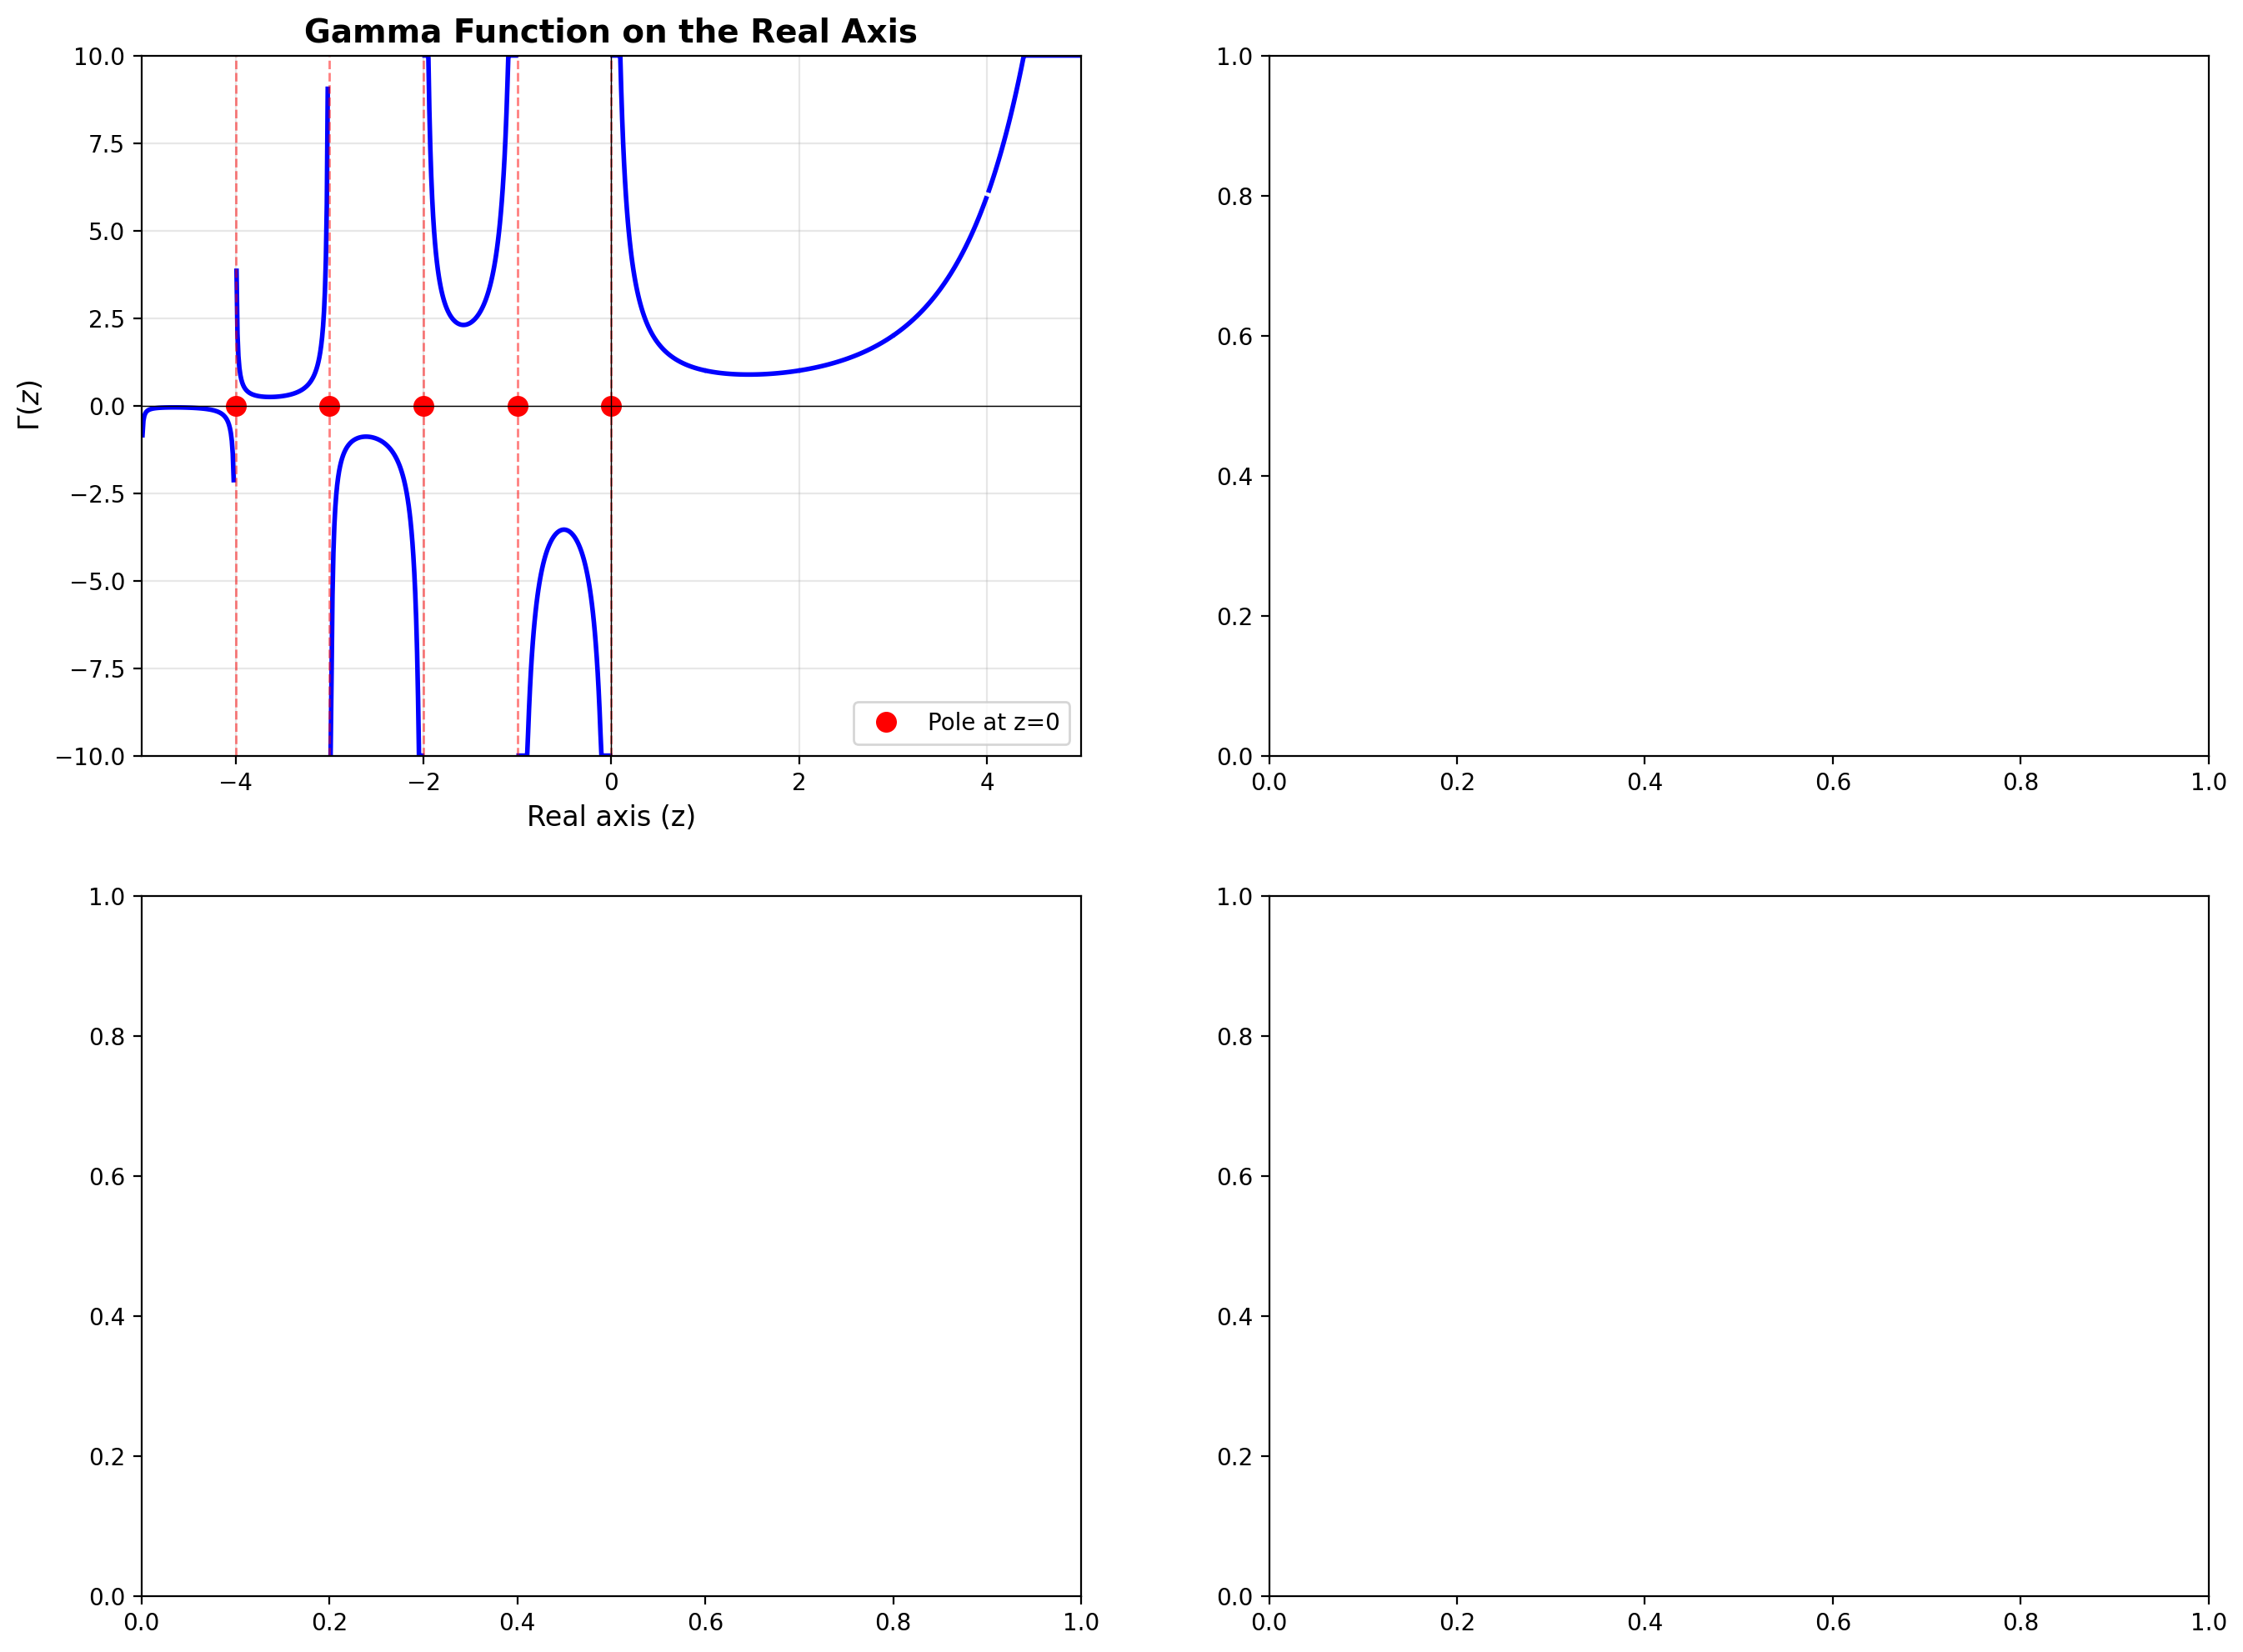

In [2]:
from scipy.special import gamma

# Compute the Gamma function along the real axis
x = np.linspace(-5, 5, 1000)

# Avoid poles by breaking into segments
segments = []
for k in range(-5, 5):
    mask = (x > k + 0.01) & (x < k + 0.99)
    if np.any(mask):
        x_seg = x[mask]
        y_seg = gamma(x_seg)
        # Clip extreme values for visualization
        y_seg = np.clip(y_seg, -10, 10)
        segments.append((x_seg, y_seg))

# Plot the Gamma function
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Panel 1: Real axis behavior
ax = axes[0, 0]
for x_seg, y_seg in segments:
    ax.plot(x_seg, y_seg, 'b-', linewidth=2)
    
# Mark poles
poles = [0, -1, -2, -3, -4]
for p in poles:
    ax.axvline(p, color='red', linestyle='--', alpha=0.5, linewidth=1)
    ax.plot(p, 0, 'ro', markersize=8, label=f'Pole at z={p}' if p == 0 else '')

ax.axhline(0, color='k', linewidth=0.5)
ax.axvline(0, color='k', linewidth=0.5)
ax.set_xlim(-5, 5)
ax.set_ylim(-10, 10)
ax.set_xlabel('Real axis (z)', fontsize=12)
ax.set_ylabel(r'$\Gamma(z)$', fontsize=12)
ax.set_title('Gamma Function on the Real Axis', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend()

## 3. Example: Rational Functions with Multiple Poles

Consider the rational function:

$$f(z) = \frac{1}{z^2 + 1} = \frac{1}{(z-i)(z+i)}$$

This function has:
- **Simple poles** at $z = i$ and $z = -i$
- **Residues**: Using the formula for simple poles,

$$\text{Res}(f, i) = \lim_{z \to i} (z - i) f(z) = \frac{1}{2i}$$

$$\text{Res}(f, -i) = \lim_{z \to -i} (z + i) f(z) = -\frac{1}{2i}$$

In [3]:
# Visualize the magnitude of f(z) = 1/(z^2 + 1) in the complex plane
ax = axes[0, 1]

# Create a grid in the complex plane
x_range = np.linspace(-3, 3, 400)
y_range = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x_range, y_range)
Z = X + 1j*Y

# Compute f(z) = 1/(z^2 + 1)
F = 1 / (Z**2 + 1)
magnitude = np.abs(F)

# Use logarithmic scale for better visualization near poles
magnitude_log = np.log10(magnitude + 1e-10)
magnitude_log = np.clip(magnitude_log, -2, 2)

# Plot as a heatmap
im = ax.contourf(X, Y, magnitude_log, levels=50, cmap='viridis')
ax.plot([0], [1], 'r*', markersize=15, label='Pole at z=i')
ax.plot([0], [-1], 'r*', markersize=15, label='Pole at z=-i')
ax.set_xlabel('Re(z)', fontsize=12)
ax.set_ylabel('Im(z)', fontsize=12)
ax.set_title(r'$|f(z)| = |1/(z^2+1)|$ (log scale)', fontsize=14, fontweight='bold')
ax.legend(loc='upper right')
ax.set_aspect('equal')
plt.colorbar(im, ax=ax, label=r'$\log_{10}|f(z)|$')

<Figure size 1600x1200 with 0 Axes>

## 4. The Tangent Function: Infinite Poles

The tangent function is meromorphic with infinitely many simple poles:

$$\tan(z) = \frac{\sin(z)}{\cos(z)}$$

**Poles**: Located at $z_n = \frac{\pi}{2} + n\pi$ for $n \in \mathbb{Z}$, where $\cos(z_n) = 0$

**Residues**: Each pole has residue $-1$ (can be computed using L'Hôpital's rule):

$$\text{Res}(\tan, z_n) = \lim_{z \to z_n} (z - z_n) \frac{\sin(z)}{\cos(z)} = \frac{\cos(z_n)}{-\sin(z_n)} = -1$$

In [4]:
# Visualize tan(z) on the real axis
ax = axes[1, 0]

x = np.linspace(-2*np.pi, 2*np.pi, 2000)

# Break into segments around poles at π/2 + nπ
tan_segments = []
for n in range(-2, 3):
    pole = np.pi/2 + n*np.pi
    if n < 2:
        next_pole = np.pi/2 + (n+1)*np.pi
        mask = (x > pole + 0.05) & (x < next_pole - 0.05)
    else:
        mask = (x > pole + 0.05) & (x < 2*np.pi)
    
    if np.any(mask):
        x_seg = x[mask]
        y_seg = np.tan(x_seg)
        y_seg = np.clip(y_seg, -10, 10)
        tan_segments.append((x_seg, y_seg))

for x_seg, y_seg in tan_segments:
    ax.plot(x_seg, y_seg, 'b-', linewidth=2)

# Mark poles
for n in range(-2, 3):
    pole = np.pi/2 + n*np.pi
    ax.axvline(pole, color='red', linestyle='--', alpha=0.5, linewidth=1)
    ax.plot(pole, 0, 'ro', markersize=8)

ax.axhline(0, color='k', linewidth=0.5)
ax.axvline(0, color='k', linewidth=0.5)
ax.set_xlim(-2*np.pi, 2*np.pi)
ax.set_ylim(-10, 10)
ax.set_xlabel('Re(z)', fontsize=12)
ax.set_ylabel(r'$\tan(z)$', fontsize=12)
ax.set_title('Tangent Function (Infinitely Many Poles)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

# Add π labels
pi_ticks = [-2*np.pi, -np.pi, 0, np.pi, 2*np.pi]
pi_labels = [r'$-2\pi$', r'$-\pi$', '0', r'$\pi$', r'$2\pi$']
ax.set_xticks(pi_ticks)
ax.set_xticklabels(pi_labels)

[Text(-6.283185307179586, 0, '$-2\\pi$'),
 Text(-3.141592653589793, 0, '$-\\pi$'),
 Text(0.0, 0, '0'),
 Text(3.141592653589793, 0, '$\\pi$'),
 Text(6.283185307179586, 0, '$2\\pi$')]

## 5. Computational Example: Residue Calculation

Let's verify the residue theorem numerically. Consider:

$$f(z) = \frac{z^2}{(z-1)(z-2)(z+i)}$$

This function has simple poles at $z = 1, 2, -i$.

For a simple pole at $z = z_0$ of $f(z) = g(z)/h(z)$ where $g(z_0) \neq 0$ and $h(z_0) = 0$:

$$\text{Res}(f, z_0) = \frac{g(z_0)}{h'(z_0)}$$

We'll compute residues analytically and verify by numerical contour integration.

In [5]:
def f(z):
    """The meromorphic function f(z) = z^2 / ((z-1)(z-2)(z+i))"""
    return z**2 / ((z - 1) * (z - 2) * (z + 1j))

def compute_residue_simple_pole(numerator_at_pole, denominator_derivative_at_pole):
    """Compute residue for a simple pole using the formula Res = g(z0)/h'(z0)"""
    return numerator_at_pole / denominator_derivative_at_pole

# Analytical residue calculation
# f(z) = z^2 / ((z-1)(z-2)(z+i))
# Pole at z=1: numerator = 1, denominator derivative = (z-2)(z+i) + (z-1)(z+i) + (z-1)(z-2) at z=1
z0 = 1
num_1 = z0**2
h_1 = (z0 - 2)*(z0 + 1j) + (z0 - 1)*(z0 + 1j) + (z0 - 1)*(z0 - 2)
res_1 = num_1 / h_1

# Pole at z=2
z0 = 2
num_2 = z0**2
h_2 = (z0 - 1)*(z0 + 1j) + (z0 - 1)*(z0 - 2) + (z0 - 2)*(z0 + 1j)
res_2 = num_2 / h_2

# Pole at z=-i
z0 = -1j
num_3 = z0**2
h_3 = (z0 - 1)*(z0 - 2) + (z0 - 1)*(z0 + 1j) + (z0 - 2)*(z0 + 1j)
res_3 = num_3 / h_3

print("Analytical Residue Calculations:")
print(f"Res(f, 1) = {res_1:.6f}")
print(f"Res(f, 2) = {res_2:.6f}")
print(f"Res(f, -i) = {res_3:.6f}")
print(f"Sum of residues = {res_1 + res_2 + res_3:.6f}")
print()

# Numerical verification via contour integration
# Integrate around a circle of radius 3 centered at origin (encloses all three poles)
def contour_integral(func, center, radius, n_points=1000):
    """Numerically integrate func around a circular contour"""
    theta = np.linspace(0, 2*np.pi, n_points)
    z = center + radius * np.exp(1j * theta)
    dz = 1j * radius * np.exp(1j * theta) * (2*np.pi / n_points)
    
    integral = np.sum(func(z) * dz)
    return integral

# Integrate around circle enclosing all poles
integral_all = contour_integral(f, 0, 3)
residue_sum_from_integral = integral_all / (2j * np.pi)

print("Numerical Verification (Contour Integration):")
print(f"Contour integral / (2πi) = {residue_sum_from_integral:.6f}")
print(f"Difference from analytical sum: {np.abs(residue_sum_from_integral - (res_1 + res_2 + res_3)):.2e}")

Analytical Residue Calculations:
Res(f, 1) = -0.500000+0.500000j
Res(f, 2) = 1.600000-0.800000j
Res(f, -i) = -0.100000+0.300000j
Sum of residues = 1.000000-0.000000j

Numerical Verification (Contour Integration):
Contour integral / (2πi) = 1.003050-0.001350j
Difference from analytical sum: 3.34e-03


## 6. Phase Portrait Visualization

A powerful way to visualize meromorphic functions is through **phase portraits**, where:
- **Hue** represents the argument (phase) of $f(z)$
- **Brightness** represents the magnitude of $f(z)$

Poles appear as points where all colors meet (rapid phase winding), while zeros appear as dark points.

In [6]:
def phase_portrait(func, x_range, y_range, resolution=500):
    """Create a phase portrait of a complex function"""
    x = np.linspace(x_range[0], x_range[1], resolution)
    y = np.linspace(y_range[0], y_range[1], resolution)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j*Y
    
    # Evaluate function
    W = func(Z)
    
    # Compute phase and magnitude
    phase = np.angle(W)
    magnitude = np.abs(W)
    
    # Normalize for visualization
    # Use logarithmic scaling for magnitude
    brightness = np.log(magnitude + 1) / np.log(np.percentile(magnitude, 99) + 1)
    brightness = np.clip(brightness, 0, 1)
    
    # Convert phase to hue (0 to 1)
    hue = (phase + np.pi) / (2 * np.pi)
    
    # Create HSV image
    hsv = np.zeros((resolution, resolution, 3))
    hsv[:, :, 0] = hue
    hsv[:, :, 1] = 1  # Full saturation
    hsv[:, :, 2] = brightness
    
    # Convert to RGB
    from matplotlib.colors import hsv_to_rgb
    rgb = hsv_to_rgb(hsv)
    
    return X, Y, rgb

# Create phase portrait for our example function
ax = axes[1, 1]

X, Y, rgb = phase_portrait(f, [-3, 4], [-3, 3], resolution=600)

ax.imshow(rgb, extent=[-3, 4, -3, 3], origin='lower', interpolation='bilinear')
ax.plot([1, 2, 0], [0, 0, -1], 'w*', markersize=12, markeredgecolor='black', markeredgewidth=1)
ax.set_xlabel('Re(z)', fontsize=12)
ax.set_ylabel('Im(z)', fontsize=12)
ax.set_title(r'Phase Portrait of $f(z) = z^2/[(z-1)(z-2)(z+i)]$', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, color='white', linewidth=0.5)

# Add legend for poles
from matplotlib.patches import Patch
legend_elements = [plt.Line2D([0], [0], marker='*', color='w', markerfacecolor='w',
                              markeredgecolor='black', markersize=10, label='Poles', linestyle='None')]
ax.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.savefig('meromorphic_functions_analysis.png', dpi=150, bbox_inches='tight')
print("\nPlot saved as 'plot.png'")
plt.show()


Plot saved as 'plot.png'


<Figure size 1600x1200 with 0 Axes>

## 7. Applications and Significance

Meromorphic functions play a crucial role in:

1. **Complex Analysis**: They form the natural generalization of rational functions to infinite-dimensional spaces

2. **Number Theory**: The Riemann zeta function $\zeta(s)$ is meromorphic with a single pole at $s=1$, central to the distribution of prime numbers

3. **Physics**: 
   - Propagators in quantum field theory are meromorphic functions of momentum
   - S-matrix theory uses meromorphic structure to analyze scattering amplitudes

4. **Differential Equations**: Solutions to many ODEs in the complex plane are meromorphic functions

5. **Residue Calculus**: Enables evaluation of real integrals via contour integration:

$$\int_{-\infty}^{\infty} f(x) \, dx = 2\pi i \sum_{\text{Im}(z_k) > 0} \text{Res}(f, z_k)$$

### Conclusion

Meromorphic functions provide a rich framework for understanding complex-analytic behavior beyond holomorphic functions. Their pole structure, captured by residues, makes them computationally tractable while retaining deep mathematical properties.